# Testing code for find dead neurons

In [ ]:
for item, target in test_dataset.take(1):
    data = item

In [ ]:
sample_data = np.expand_dims(data[0], axis = 0) 
sample_data.shape

(1, 32, 32, 3)

In [ ]:
sample_data

# sample_data = np.copy(sample_data)

# sample_data[0].shape


array([[[[-1.4340936 , -0.13216572, -1.0573398 ],
         [-1.4141381 , -0.11239003, -1.0376757 ],
         [-1.4141381 , -0.11239003, -1.0180116 ],
         ...,
         [-1.374227  , -0.1519414 , -1.0376757 ],
         [-1.3542717 , -0.13216572, -1.0180116 ],
         [-1.4141381 , -0.25081983, -1.1163323 ]],

        [[-1.4141381 , -0.11239003, -1.0376757 ],
         [-1.4141381 , -0.11239003, -1.0376757 ],
         [-1.4141381 , -0.11239003, -1.0180116 ],
         ...,
         [-1.374227  , -0.1519414 , -1.0376757 ],
         [-1.3343161 , -0.17171709, -0.9983474 ],
         [-1.4141381 , -0.25081983, -1.1163323 ]],

        [[-1.4340936 , -0.09261435, -1.0180116 ],
         [-1.454049  , -0.11239003, -1.0376757 ],
         [-1.4141381 , -0.07283866, -0.9983474 ],
         ...,
         [-1.3343161 , -0.17171709, -0.9983474 ],
         [-1.3343161 , -0.19149278, -0.97868323],
         [-1.4141381 , -0.25081983, -1.077004  ]],

        ...,

        [[-1.1547168 ,  0.18424527, -0

In [ ]:
outputs = [layer.output for layer in simple_relu_model_best.layers if "conv" in layer.name]
outputs_name = [layer.name for layer in simple_relu_model_best.layers if "conv" in layer.name]

In [ ]:
outputs
outputs_name

['conv2d_21', 'conv2d_22', 'conv2d_23']

In [ ]:
# https://www.geeksforgeeks.org/accessing-intermediate-layer-outputs-in-keras/

from keras.models import  Model

# Create a new model to get the output of the first layer
# layer_output_model = Model(inputs=simple_relu_model_best.input, outputs=simple_relu_model_best.layers[1].output)
layer_output_model = Model(inputs=simple_relu_model_best.input, outputs=outputs)

# Get the output of the first layer
# layer_output = layer_output_model.predict(sample_data)
layer_output = layer_output_model.predict(data)

# Print the output of the first layer
print("Output of the first layer:\n", layer_output)

4/4 [==============================] - 0s 7ms/step
Output of the first layer:
 [array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 7.80999660e-03, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 2.91055441e-03, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
data = []
for index, layer in enumerate(layer_output):
    print(outputs_name[index])
    print(np.shape(layer))
    print(layer.size)
    total_activations = layer.size
    print(np.count_nonzero(layer==0))
    zero_count = np.count_nonzero(layer==0)
    print(f"layer sparcity: {zero_count / total_activations  * 100:.2f}%"  )
    data.append([outputs_name[index], round(zero_count / total_activations  * 100, 2)])
    # print(np.count_nonzero(np.sum(layer, axis=0) == 0))


conv2d_21
(128, 30, 30, 32)
3686400
2523985
layer sparcity: 68.47%
conv2d_22
(128, 13, 13, 64)
1384448
1195599
layer sparcity: 86.36%
conv2d_23
(128, 4, 4, 128)
262144
238436
layer sparcity: 90.96%


In [ ]:
import pandas as pd

data

data_df = pd.DataFrame(data, columns=('layer', 'Number of Dead neurons in %'))

<Axes: xlabel='layer', ylabel='Number of Dead neurons in %'>

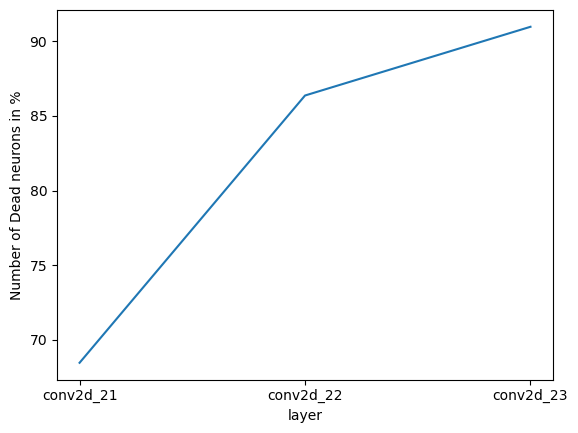

In [ ]:
sns.lineplot(data=data_df, x='layer', y='Number of Dead neurons in %')

# Testing code for deprocessing an image

In [ ]:
def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    # img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

In [ ]:
img = deprocess_image(sample_data[0])

img.shape

(32, 32, 3)

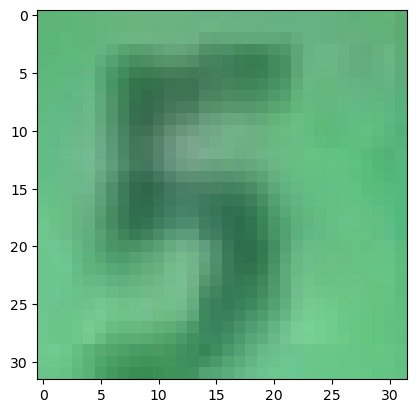

In [ ]:
plt.imshow(img)

# Confusion Matrix

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

cm = confusion_matrix()

# Misc

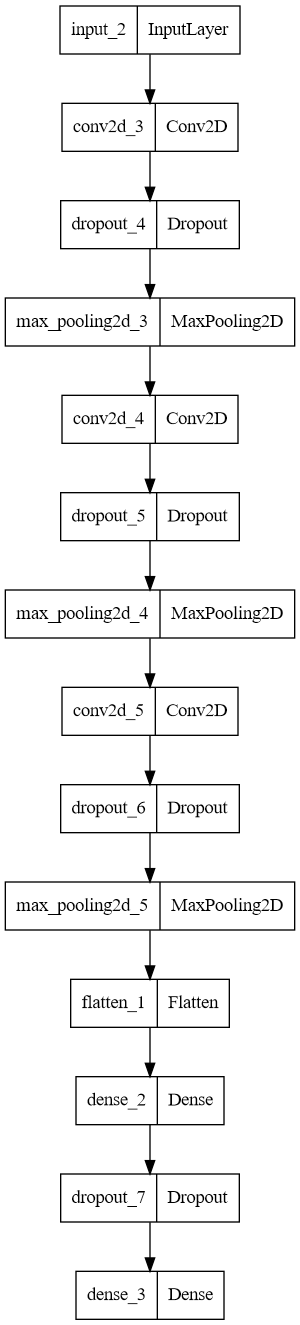

In [ ]:
from keras.utils import plot_model

plot_model(model_Relu, to_file='model_Relu.png')

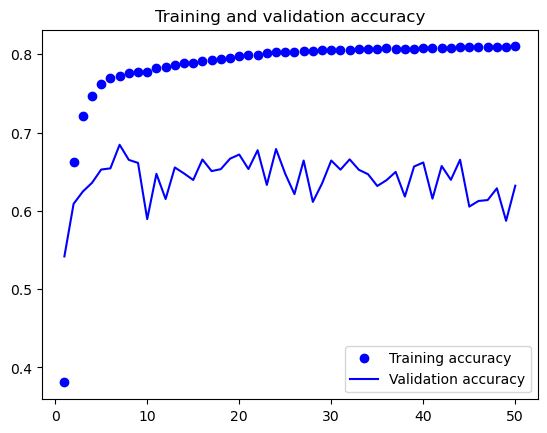

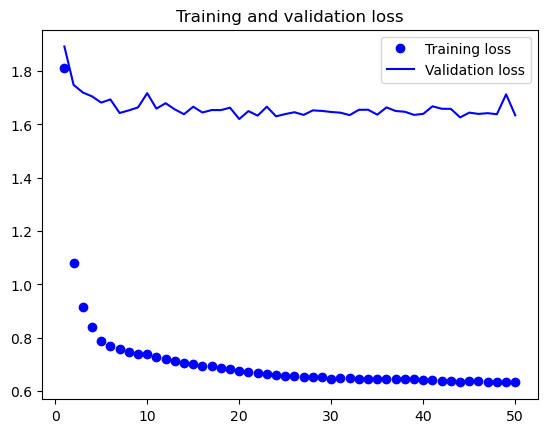

In [ ]:
# Code taken from Deep Learning with Python, Second Edition Chapter 8 Listing 8.12

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# New parameters model
# model_07/12_12:00_epochs

import tensorflow as tf
import tensorflow_addons as tfa
from keras.constraints import max_norm
from keras.optimizers import Adam

# Build the model
model_4 = tf.keras.Sequential([

    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),  # Input layer
    # tf.keras.layers.Dropout(.1),              

    # tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), padding="same", kernel_constraint=max_norm(4)),                              
    tf.keras.layers.Conv2D(1024, (5, 5), strides=(1, 1), padding="same"), 
    tf.keras.layers.Dropout(.5),                             
    tfa.layers.Maxout(num_units=2),                   
                     
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    

    # tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1), padding="same" , kernel_constraint=max_norm(4)),              
    tf.keras.layers.Conv2D(2048, (5, 5), strides=(1, 1), padding="same"),  
    tf.keras.layers.Dropout(.5),             
    tfa.layers.Maxout(num_units=2),                   #
                      #
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    

    # tf.keras.layers.Conv2D(128, (5, 5), strides=(1, 1), padding="same" , kernel_constraint=max_norm(4)),              
    tf.keras.layers.Conv2D(4096, (5, 5), strides=(1, 1), padding="same"), 
    tf.keras.layers.Dropout(.5),             
    tfa.layers.Maxout(num_units=2),                   
                  
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    


    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128,kernel_constraint=max_norm(4)),   
    tf.keras.layers.Dense(4096),
    tf.keras.layers.Dropout(.5),   
    tfa.layers.Maxout(num_units=2),
 
    
    # tf.keras.layers.Dense(10, activation='softmax', kernel_constraint=max_norm(4))    # Output layer for 10 classes
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer for 10 classes
])

# Compile the model
optimizer = Adam(beta_1=0.95)
model_4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 1024)      77824     
                                                                 
 dropout_39 (Dropout)        (None, 32, 32, 1024)      0         
                                                                 
 maxout_45 (Maxout)          (None, 32, 32, 2)         0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 15, 15, 2048)      104448    
                                                                 
 dropout_40 (Dropout)        (None, 15, 15, 2048)      0         
                                                      

In [ ]:
history = model_4.fit(
    X_train_normalized, y_train_oh,                # Training data and labels
    validation_data=(X_val_normalized, y_val_oh),  # Validation data and labels
    batch_size=128,                   # Number of samples per batch
    epochs=100,                       # Number of epochs
    class_weight=d_class_weights,
    verbose=1                        # Verbosity mode (1 for progress bar)
)

Epoch 1/100
 229/4675 [>.............................] - ETA: 8:58 - loss: 2.3055 - accuracy: 0.1340

KeyboardInterrupt: 

In [ ]:
# New Parameters Model

import tensorflow as tf
import tensorflow_addons as tfa
from keras.constraints import max_norm
from keras.optimizers import Adam

# Build the model
model = tf.keras.Sequential([

    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),  # Input layer
    tf.keras.layers.Dropout(.1),              

    tf.keras.layers.Conv2D(96, (5, 5), strides=(1, 1), padding="same", kernel_constraint=max_norm(4)),  
    tfa.layers.Maxout(num_units=2),                         
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Dropout(.25),

    tf.keras.layers.Conv2D(128, (5, 5), strides=(1, 1), padding="same" , kernel_constraint=max_norm(4)), 
    tfa.layers.Maxout(num_units=2),                       #
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Dropout(.25),

    tf.keras.layers.Conv2D(256, (5, 5), strides=(1, 1), padding="same" , kernel_constraint=max_norm(4)),
    tfa.layers.Maxout(num_units=2),                   
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Dropout(.5),
  
    tf.keras.layers.Flatten(),
        
    tf.keras.layers.Dense(512,kernel_constraint=max_norm(4)),
    tfa.layers.Maxout(num_units=2),
    # tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Dropout(.5),

    

    tf.keras.layers.Dense(10, activation='softmax', kernel_constraint=max_norm(4))    # Output layer for 10 classes
])

# Compile the model
optimizer = Adam(beta_1=0.95)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 96)        7296      
                                                                 
 maxout (Maxout)             (None, 32, 32, 2)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 2)        0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 2)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 128)       6528      
                                                        

In [ ]:
history = model.fit(
    X_train_reshaped, y_train_flatten,                # Training data and labels
    validation_data=(X_val_reshaped, y_val_flatten),  # Validation data and labels
    batch_size=2048,                   # Number of samples per batch
    epochs=50,                       # Number of epochs
    class_weight=class_weights,
    verbose=1                        # Verbosity mode (1 for progress bar)
)

Epoch 1/50
293/293 [==============================] - 31s 103ms/step - loss: 2.4519 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.1132
Epoch 2/50
293/293 [==============================] - 30s 101ms/step - loss: 2.2848 - accuracy: 0.1292 - val_loss: 2.2323 - val_accuracy: 0.1878
Epoch 3/50
293/293 [==============================] - 30s 101ms/step - loss: 2.2197 - accuracy: 0.1751 - val_loss: 2.1126 - val_accuracy: 0.2703
Epoch 4/50
293/293 [==============================] - 30s 101ms/step - loss: 2.1603 - accuracy: 0.1762 - val_loss: 2.0461 - val_accuracy: 0.2732
Epoch 5/50
293/293 [==============================] - 30s 101ms/step - loss: 2.0963 - accuracy: 0.1854 - val_loss: 1.9493 - val_accuracy: 0.2880
Epoch 6/50
293/293 [==============================] - 30s 102ms/step - loss: 2.0540 - accuracy: 0.1934 - val_loss: 2.0450 - val_accuracy: 0.2702
Epoch 7/50
293/293 [==============================] - 30s 102ms/step - loss: 2.0329 - accuracy: 0.2011 - val_loss: 1.9544 - val_ac

KeyboardInterrupt: 

In [2]:
import tensorflow as tf

layer = tf.keras.layers.Dense(100)
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [4]:
layer.

[<tf.Variable 'dense/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 1.06681213e-01, -1.52723640e-01, -5.54380566e-02,
          1.33664742e-01, -1.84960276e-01,  4.13018018e-02,
         -1.91976726e-01,  2.35552743e-01, -1.21747695e-01,
         -3.63288373e-02, -2.34940916e-01,  1.07284710e-01,
         -1.92860812e-01,  1.57239184e-01, -2.24367425e-01,
          1.61277935e-01,  1.44534335e-01,  2.14312226e-02,
         -2.68657357e-02,  9.82749313e-02, -7.17942417e-02,
         -2.09335253e-01, -8.29457045e-02,  7.37269670e-02,
         -1.40432835e-01,  1.36496872e-02,  9.02615935e-02,
          2.34226003e-01,  1.84583381e-01,  1.49019554e-01,
         -4.57988381e-02, -8.76243114e-02, -4.02528644e-02,
          2.02113047e-01,  1.59496799e-01, -9.37500298e-02,
          9.69841629e-02,  1.20935664e-01, -6.73339069e-02,
         -1.27320349e-01,  1.38348535e-01, -1.22298189e-01,
          1.02117375e-01,  1.11980751e-01, -2.18636379e-01,
         -1.91056132e-01, -4.310

# keras tuner version

In [2]:
import keras_tuner
import keras

keras_tuner.__version__
keras.__version__

'2.10.0'

In [206]:
import tensorflow as tf

dataset = tf.data.Dataset.range(4)
dataset = dataset.shuffle(2)

In [100]:
# dataset = dataset.take(2)
print(list(dataset.as_numpy_iterator()))
print(list(dataset.as_numpy_iterator()))
print(list(dataset.as_numpy_iterator()))
print(list(dataset.as_numpy_iterator()))

[1, 0, 2, 4, 3]
[0, 2, 3, 4, 1]
[1, 2, 0, 4, 3]
[0, 2, 1, 4, 3]


In [85]:
def printDs(ds, quantity= 5):
    print('---------------------')
    for example in ds.take(quantity):
        print(example)

In [216]:
printDs(dataset, 10)

---------------------
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
tuner_reload = keras_tuner.RandomSearch(
    hypermodel=simple_model_Relu_with_dropout_hyper_p,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    # overwrite=True,
    directory="test",
    project_name="simple_model_Relu_with_dropout_hyper_p_v5",
    overwrite=False,
)

Reloading Tuner from test\simple_model_Relu_with_dropout_hyper_p_v5\tuner0.json


In [ ]:
tuner_reload.reload()
trials = tuner_reload.oracle.trials

In [ ]:
tuner_reload.results_summary()

Results summary
Results in test\simple_model_Relu_with_dropout_hyper_p_v5
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
rate_1: 0.25
rate_2: 0.5
rate_3: 0.5
rate_4: 0.5
rate_5: 0.75
Score: 0.8981666564941406

Trial 0 summary
Hyperparameters:
rate_1: 0.25
rate_2: 0.75
rate_3: 0.75
rate_4: 0.25
rate_5: 0.25
Score: 0.8866666555404663

Trial 2 summary
Hyperparameters:
rate_1: 0.5
rate_2: 0.25
rate_3: 0.5
rate_4: 0.5
rate_5: 0.5
Score: 0.8731666803359985

Trial 1 summary
Hyperparameters:
rate_1: 0.75
rate_2: 0.75
rate_3: 0.25
rate_4: 0.5
rate_5: 0.25
Score: 0.7551666498184204

Trial 3 summary
Hyperparameters:
rate_1: 0.75
rate_2: 0.25
rate_3: 0.5
rate_4: 0.25
rate_5: 0.75
Score: 0.7488333582878113


In [ ]:
for trial_id, trial in trials.items():
       print(trial_id, trial.score)

4 0.8981666564941406
2 0.8731666803359985
3 0.7488333582878113
1 0.7551666498184204
0 0.8866666555404663


In [ ]:
test_dict = {
    'conv_1': {'1': 2, '2':0},
    'conv_2': {'1': 2, '2':1},
    'conv_3': {'1': 2, '2':3},
}

In [15]:
import numpy as np

original_array = np.random.rand(2, 2, 2, 10)

mean_array = np.mean(original_array, axis=(0,1,2))

print(original_array)
mean_array

[[[[0.48271789 0.40609482 0.87980465 0.93135642 0.37785296 0.74963181
    0.38917334 0.6616736  0.82739853 0.12231754]
   [0.2700111  0.94985874 0.10223235 0.81817462 0.246948   0.85339798
    0.26750933 0.31015356 0.92998932 0.45567811]]

  [[0.46915295 0.5175836  0.03785737 0.78436346 0.93438754 0.0322834
    0.80079603 0.51026796 0.08256294 0.83374749]
   [0.68862423 0.69170252 0.6264545  0.3940537  0.97191288 0.77072875
    0.72770974 0.34594956 0.61551186 0.72716689]]]


 [[[0.27664955 0.76915625 0.76106096 0.23021457 0.27038355 0.60993285
    0.4813951  0.97976809 0.5162321  0.95643367]
   [0.31385618 0.03249417 0.41251041 0.69358773 0.52918798 0.20445516
    0.04646013 0.89129383 0.29210633 0.08870721]]

  [[0.92183919 0.45344533 0.99696807 0.79561529 0.36897044 0.29780753
    0.20477393 0.24783528 0.02370545 0.3333103 ]
   [0.79169434 0.40707199 0.19745653 0.82271597 0.82953444 0.57394056
    0.90712743 0.12650741 0.348571   0.67963531]]]]


array([0.52681818, 0.52842593, 0.5017931 , 0.68376022, 0.56614722,
       0.51152225, 0.47811813, 0.50918116, 0.45450969, 0.52462456])

In [139]:
arr = np.arange(5)

In [140]:
arr_1 = np.random.choice(arr, 3, replace=False)

In [141]:
ind = np.zeros(arr.shape[0], dtype=bool)

In [142]:
ind

array([False, False, False, False, False])

In [143]:
ind[arr_1 ] = True

In [144]:
ind

array([ True,  True, False,  True, False])

In [145]:
rest = ~ind

In [146]:
rest

array([False, False,  True, False,  True])

# Data augmentation

In [ ]:
# bool_train_labels_0 = y_train_relabelled[:, 0] == 0
# bool_train_labels_1 = y_train_relabelled[:, 0] == 1
# bool_train_labels_2 = y_train_relabelled[:, 0] == 2
# bool_train_labels_3 = y_train_relabelled[:, 0] == 3
# bool_train_labels_4 = y_train_relabelled[:, 0] == 4
# bool_train_labels_5 = y_train_relabelled[:, 0] == 5
# bool_train_labels_6 = y_train_relabelled[:, 0] == 6
# bool_train_labels_7 = y_train_relabelled[:, 0] == 7
# bool_train_labels_8 = y_train_relabelled[:, 0] == 8
# bool_train_labels_9 = y_train_relabelled[:, 0] == 9

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def split_dataset_by_class(labels_dataset, labels):
    label_tracker = {}
    for i in labels:
        label_tracker[f'bool_train_labels_{i}'] = labels_dataset[:, 0] == i
    return label_tracker



In [ ]:
split_dataset = split_dataset_by_class(y_train_relabelled,np.arange(10) )

In [ ]:
split_dataset

{'bool_train_labels_0': array([False, False, False, ..., False,  True, False]),
 'bool_train_labels_1': array([False,  True, False, ..., False, False,  True]),
 'bool_train_labels_2': array([ True, False,  True, ..., False, False, False]),
 'bool_train_labels_3': array([False, False, False, ..., False, False, False]),
 'bool_train_labels_4': array([False, False, False, ..., False, False, False]),
 'bool_train_labels_5': array([False, False, False, ...,  True, False, False]),
 'bool_train_labels_6': array([False, False, False, ..., False, False, False]),
 'bool_train_labels_7': array([False, False, False, ..., False, False, False]),
 'bool_train_labels_8': array([False, False, False, ..., False, False, False]),
 'bool_train_labels_9': array([False, False, False, ..., False, False, False])}

In [ ]:
def seperate_dataset_classes(class_dict, features_dataset, label_dataset):
    seperate_classes = {}
    
    for i, item in  enumerate(class_dict.keys()):

        seperate_classes[f'label_{i}'] = {}
        seperate_classes[f'label_{i}'][f'features_{i}'] = features_dataset[class_dict[item]]
        seperate_classes[f'label_{i}'][f'label_{i}'] = label_dataset[class_dict[item]]
    
    return seperate_classes

In [ ]:
data_aug = seperate_dataset_classes(split_dataset, X_train_reshaped, y_train_relabelled)

In [ ]:
len(data_aug['label_3']['label_3'])

103821

In [ ]:
def resample_dataset(dataset_Dictionary):

    for key in dataset_Dictionary.keys():
            
            value = str(list(dataset_Dictionary[key])[0])

            print(len(dataset_Dictionary[key][value]))

            ids = np.arange(len(dataset_Dictionary[key][value]))

            choices = np.random.choice(ids, len(dataset_Dictionary['label_1']['features_1']))

            for key_1 in dataset_Dictionary[key].keys():
                  dataset_Dictionary[key][key_1] = dataset_Dictionary[key][key_1][choices]
            
            # print(str(list(dataset_Dictionary[key])[0]))
        # for value in dataset_Dictionary[key]:

            # ids = np.arange(len(dataset_Dictionary[key][value]))
        # print(len(list(dataset_Dictionary[key])[0]))
            # print(value)

In [ ]:
resample_dataset(data_aug)

49898
103821
84725
68662
57491
59772
46709
48992
39803
38515


In [ ]:
len(data_aug['label_2']['features_2'])

103821

In [ ]:
resample_features_list =[]
resample_label_list = []

for i in np.arange(10):

    resample_features_list.append(data_aug[f'label_{i}'][f'features_{i}'])
    resample_label_list.append(data_aug[f'label_{i}'][f'label_{i}'])


    



In [ ]:
resampled_features = np.dtype(np.concatenate(resample_features_list, axis=0),'uint8')
resampled_labels = np.concatenate(resample_label_list, axis=0)

MemoryError: Unable to allocate 11.9 GiB for an array with shape (1038210, 32, 32, 3) and data type float32

In [ ]:
# features_0 = X_train_reshaped[bool_train_labels_0]
# label_0 = y_train_relabelled[bool_train_labels_0]

# features_1 = X_train_reshaped[bool_train_labels_2]
# label_1 = y_train_relabelled[bool_train_labels_1]

# features_2 = X_train_reshaped[bool_train_labels_2]
# label_2 = y_train_relabelled[bool_train_labels_2]

# features_3 = X_train_reshaped[bool_train_labels_3]
# label_3 = y_train_relabelled[bool_train_labels_3]

# features_4 = X_train_reshaped[bool_train_labels_4]
# label_4 = y_train_relabelled[bool_train_labels_4]

# features_5 = X_train_reshaped[bool_train_labels_5]
# label_5 = y_train_relabelled[bool_train_labels_5]

# features_6 = X_train_reshaped[bool_train_labels_6]
# label_6 = y_train_relabelled[bool_train_labels_6]

# features_7 = X_train_reshaped[bool_train_labels_7]
# label_7 = y_train_relabelled[bool_train_labels_7]

# features_8 = X_train_reshaped[bool_train_labels_8]
# label_8 = y_train_relabelled[bool_train_labels_8]

# features_9 = X_train_reshaped[bool_train_labels_9]
# label_9 = y_train_relabelled[bool_train_labels_9]


In [ ]:
# ids = np.arange(len(features_9))
# choices = np.random.choice(ids, len(features_9)/2)

# Reload Model and Data

In [ ]:
# Time
initial_relu_model_with_dropblock_hyper_p_time = np.load(model_3_hyper_v_path + 'initial_relu_model_with_dropblock_hyper_p_time.npy', allow_pickle=True)

# History
initial_relu_model_with_dropblock_hyper_p_time = np.load(model_3_hyper_v_path + 'initial_relu_model_with_dropblock_hyper_p_history.npy', allow_pickle=True).item()



# Adding new layers

In [ ]:
# https://stackoverflow.com/questions/49492255/how-to-replace-or-insert-intermediate-layer-in-keras-model

# https://stackoverflow.com/questions/55737005/how-to-add-layers-to-a-sequential-model-from-an-existing-model

def insert_intermediate_layer_in_keras(model, layer_id, new_layer):
 
    # layers = [l for l in model.layers]
    new_model = []
    # outputs = [layer.output for layer in model.layers if layer_id in layer.name]
    # print(outputs)
    # x = layers[0].output
    for layer in model.layers:
        # new_model.append(layer)
        if [layer_name in layer.name for layer_name in layer_id] :
            # print(layer)
            # new_model.append(layer)
            new_model.append(new_layer)
        # else:
        # ¬# new_model.append(layer)
        # x = layers[i](x)
    print(new_model)
    # new_model = Model(input=layers[0].input, output=x)
    # return new_model
    updated_model = keras.Sequential(new_model)
    # print(updated_model.summary())
    return updated_model

In [ ]:
model_7_relu_w_dropout_aug_batch_new = insert_intermediate_layer_in_keras(model_7_relu_w_dropout_aug_batch,['conv', 'dense'], layers.BatchNormalization())
# insert_intermediate_layer_in_keras(model_7_relu_w_dropout_aug_batch,'conv', layers.BatchNormalization())

[]


In [ ]:
model_7_relu_w_dropout_aug_batch_new.build((None, 32,32,3))
model_7_relu_w_dropout_aug_batch_new.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_33 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        multiple                  0         
                                                                 
 conv2d_18 (Conv2D)          multiple                  896       
                                                                 
 max_pooling2d_18 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        multiple                  0         
                                                                 
 conv2d_19 (Conv2D)          multiple                

# Maxout 1 cycle code

In [ ]:
import importlib
import utils.keras_callback
importlib.reload(utils.keras_callback)
from utils.keras_callback import TimeHistory, CLR_history, stop_model
from keras.optimizers import Adam
import tensorflow_addons as tfa
import math


# MAX_LR = 2.5e-2
# INIT_LR = 1.25e-3

# MAX_LR = 1.75e-2
# INIT_LR = 1.75e-3

MAX_LR = 2e-2
INIT_LR = 1e-3


epoch_count = 25

steps_per_epoch = math.ceil(len(X_train_normalized) / BATCH_SIZE)
# validation_steps = len(X_val_normalized) // BATCH_SIZE

def scale_fn(x):
    return 1.0

clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    # scale_fn=lambda x: 1.0,               # https://stackoverflow.com/questions/67656969/what-does-tensorflows-cyclicallearningrate-scale-fn-argument-mean
    scale_fn=scale_fn,
    step_size=(steps_per_epoch * epoch_count) / 2            # 1 Cycle
)
optimizer = Adam(clr)


model_15_maxout.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy']
    )





model_15_maxout_clr_history = CLR_history()

model_15_maxout_clr_time = TimeHistory()

model_15_maxout_path = 'saved models/2. model 2 dropout/maxout/'

best_model = [tf.keras.callbacks.ModelCheckpoint(
        filepath=model_15_maxout_path  + "model_15_clr_best.keras",
        save_best_only=True,
        monitor="val_loss")
]


model_15_maxout_history = model_15_maxout.fit(
    aug_train_dataset,                                  # Training data and labels
    validation_data=(val_dataset),                  # Validation data and labels
    epochs=epoch_count,                                     # Number of epochs
    class_weight=d_class_weights,                   # Adding Class Weights
    callbacks=[ best_model, model_15_maxout_clr_history, model_15_maxout_clr_time],             # Callbacks
    verbose=1                                       # Verbosity mode (1 for progress bar)
)

Epoch 1/25
4675/4675 [==============================] - 42s 7ms/step - loss: 0.6496 - accuracy: 0.7971 - val_loss: 0.3234 - val_accuracy: 0.9043
Epoch 2/25
4675/4675 [==============================] - 35s 6ms/step - loss: 0.3740 - accuracy: 0.8939 - val_loss: 0.3416 - val_accuracy: 0.9098
Epoch 3/25
4675/4675 [==============================] - 35s 6ms/step - loss: 0.3847 - accuracy: 0.8977 - val_loss: 0.3427 - val_accuracy: 0.9157
Epoch 4/25
4675/4675 [==============================] - 35s 6ms/step - loss: 0.4028 - accuracy: 0.8973 - val_loss: 0.3822 - val_accuracy: 0.9065
Epoch 5/25
4675/4675 [==============================] - 35s 6ms/step - loss: 0.4233 - accuracy: 0.8951 - val_loss: 0.4076 - val_accuracy: 0.9040
Epoch 6/25
4675/4675 [==============================] - 35s 6ms/step - loss: 0.4442 - accuracy: 0.8925 - val_loss: 0.3884 - val_accuracy: 0.9115
Epoch 7/25
4675/4675 [==============================] - 35s 6ms/step - loss: 0.4649 - accuracy: 0.8893 - val_loss: 0.4579 - val_ac

In [ ]:
model_15_maxout_path = 'saved models/2. model 2 dropout/maxout/'
np.save(model_15_maxout_path + 'model_15_maxout_1_cycle_losses' + '.npy', model_15_maxout_clr_history.losses)
np.save(model_15_maxout_path + 'model_15_maxout_1_cycle_accuracy' + '.npy', model_15_maxout_clr_history.accuracy)

In [ ]:
import importlib
import utils.model_utils
importlib.reload(utils.model_utils)
from utils.model_utils import save_model_data

model_15_maxout_path = 'saved models/2. model 2 dropout/maxout/'

save_model_data(model_15_maxout_path,
               model_15_maxout,'model_15_maxout',
               model_15_maxout_history, 'model_15_maxout_history',
               model_15_maxout_clr_time, 'model_15_maxout_clr_time'  )

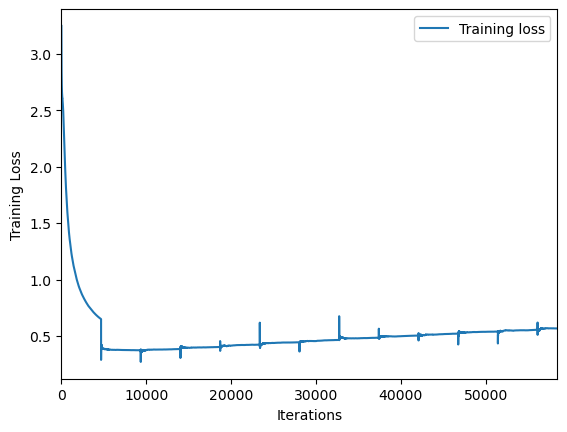

In [ ]:
import matplotlib.pyplot as plt

# (fig, ax) = plt.subplots(2, 1, figsize=(10, 8))

step = np.arange(0, (25 * steps_per_epoch)) 

lr = clr(step)

# model_history = model_11_relu_w_dropout_aug_batch_maxnorm_lr_history.history

# plt.plot(no_clr_history.history["loss"], label="train_loss")
# plt.plot(no_clr_history.history["val_loss"], label="val_loss")
# plt.set_title("No CLR")
# plt.set_xlabel("Epochs")
# plt.set_ylabel("Loss")
# plt.set_ylim([0, 2.5])
# plt.legend()

plt.plot(step,model_15_maxout_clr_history.losses , "-", label="Training loss")
# plt.plot(step,lr , "-", label="Training loss")
# plt.yscale("log")
# plt.ylim([0, 5])
plt.xlim([0, 58436])
# plt.xscale("log")
# plt.plot(lr, model_11_relu_w_dropout_aug_batch_maxnorm_lr_clr_history.accuracy , "b", label="training accuracy")
# plt.xlim([5e-3, 1e-1])
# plt.title("Training and validation accuracy " + plotname)
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.legend()


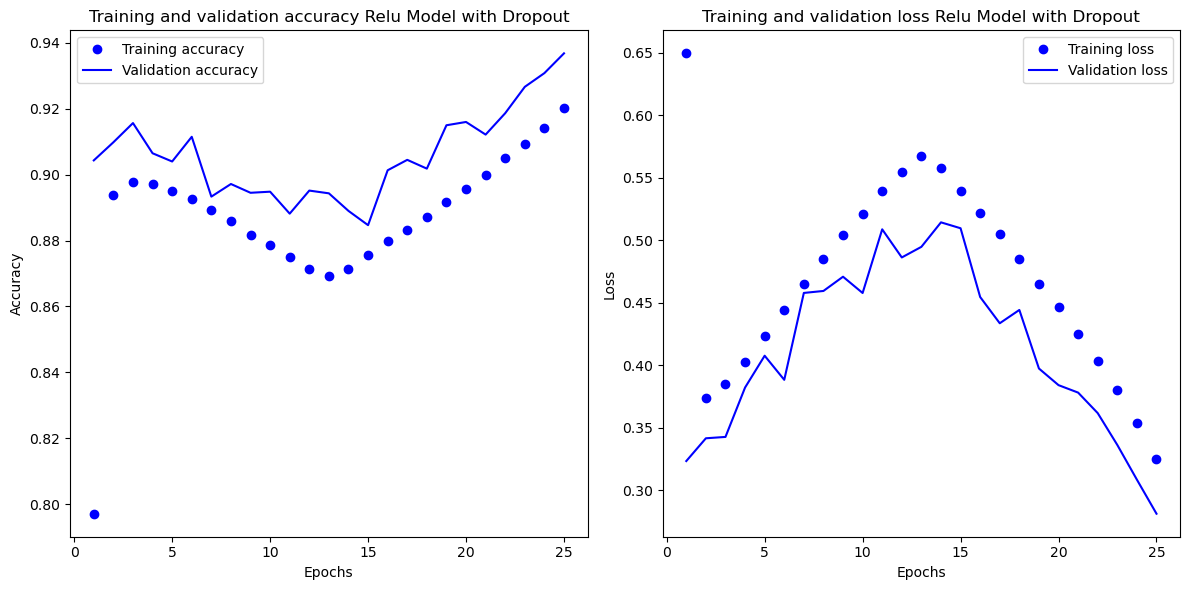

In [ ]:
import importlib
import utils.plotting
importlib.reload(utils.plotting)
from utils.plotting import display_accuracy_loss

display_accuracy_loss(model_15_maxout_history, 'Relu Model with Dropout')

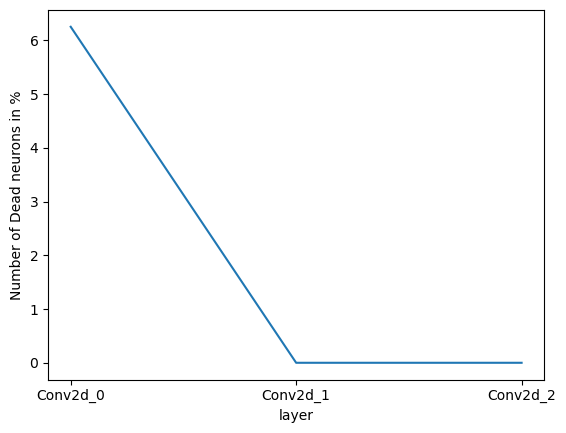

In [ ]:
import importlib
import utils.statistics
importlib.reload(utils.statistics)
from utils.statistics import display_neurons_count

display_neurons_count(model_15_maxout, test_dataset )

s:\USB Data\Media\Degree\Modules\Level 6\Final\Work\Model\utils\statistics.py:319: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis_legend.legend(fontsize='medium')


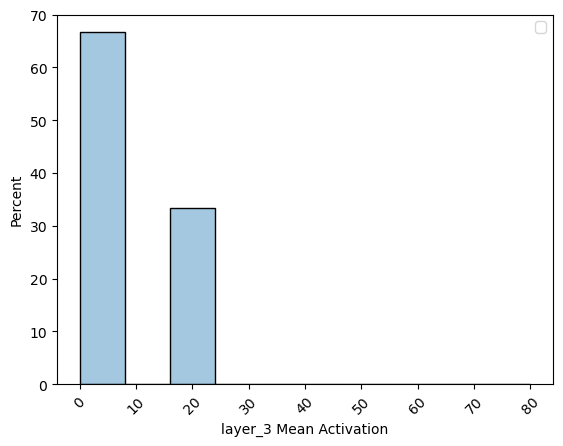

In [ ]:
import importlib
import utils.statistics
importlib.reload(utils.statistics)
from utils.statistics import display_mean_activations


display_mean_activations(model_15_maxout, test_dataset,  '3', bin_stop=80,bin_num=11)

In [ ]:
model_15_maxout.evaluate(test_dataset)

204/204 [==============================] - 1s 4ms/step - loss: 0.2750 - accuracy: 0.9424


[0.27501603960990906, 0.9424170255661011]

# Missclassifications

In [ ]:

model_name_df = model_results_df[model_results_df['Dropout / Dropblock'] != 'replicated']
model_name_df = model_name_df['Model']
model_name_list =model_name_df.to_list()
model_name_list

['Model 1A',
 'Model 1B',
 'Model 2',
 'Model 3',
 'Model 4',
 'Model 5',
 'Model 6',
 'Model 7',
 'Model 8',
 'Model 9 ',
 'Model 10',
 'Model 11',
 'Model 12',
 'Model 13',
 'Model 14',
 'Model 15',
 'Model 16',
 'Model 17',
 'Model 18']

In [ ]:
models = [
    build_simple_relu_model_basic_best,
    model_2_max_pooling_best,
    initial_relu_model_hyper_p_best,
    initial_relu_model_with_dropout_best_hyper_p,
    initial_relu_model_with_dropblock_best_hyper_p,
    model_5_relu_model_with_dropout_aug_best,
    model_6_relu_model_with_dropblock_aug_best,
    model_7_relu_w_dropout_aug_batch_best,
    model_8_relu_w_dropblock_aug_batch_best,
    model_9_bottleneck_best,
    model_10_bottleneck_best,
    model_11_maxout_best,
    model_12_maxout_best,
    model_13_maxnorm_best,
    model_14_maxnorm_best,
    model_15_l2_best,
    model_16_l2_best,
    model_17_lr_range_1_cycle_best,
    model_18_lr_range_1_cycle_best,
]



In [ ]:
import pandas as pd
import importlib
import utils.plotting
importlib.reload(utils.plotting)
from utils.plotting import confusion_matrix_misclassification

misclassification_counts = {}

for i, label in enumerate(model_name_list):
    cm_misclassifications = confusion_matrix_misclassification(models[i], test_dataset)
    misclassification_counts[label] = cm_misclassifications

misclassification_counts

{'Model 1A': 1872,
 'Model 1B': 1376,
 'Model 2': 1363,
 'Model 3': 1616,
 'Model 4': 1366,
 'Model 5': 1488,
 'Model 6': 1359,
 'Model 7': 1127,
 'Model 8': 1027,
 'Model 9 ': 1155,
 'Model 10': 1073,
 'Model 11': 1702,
 'Model 12': 1500,
 'Model 13': 1169,
 'Model 14': 1085,
 'Model 15': 1315,
 'Model 16': 1241,
 'Model 17': 1614,
 'Model 18': 1064}

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='None', ylabel='Misclassifications'>

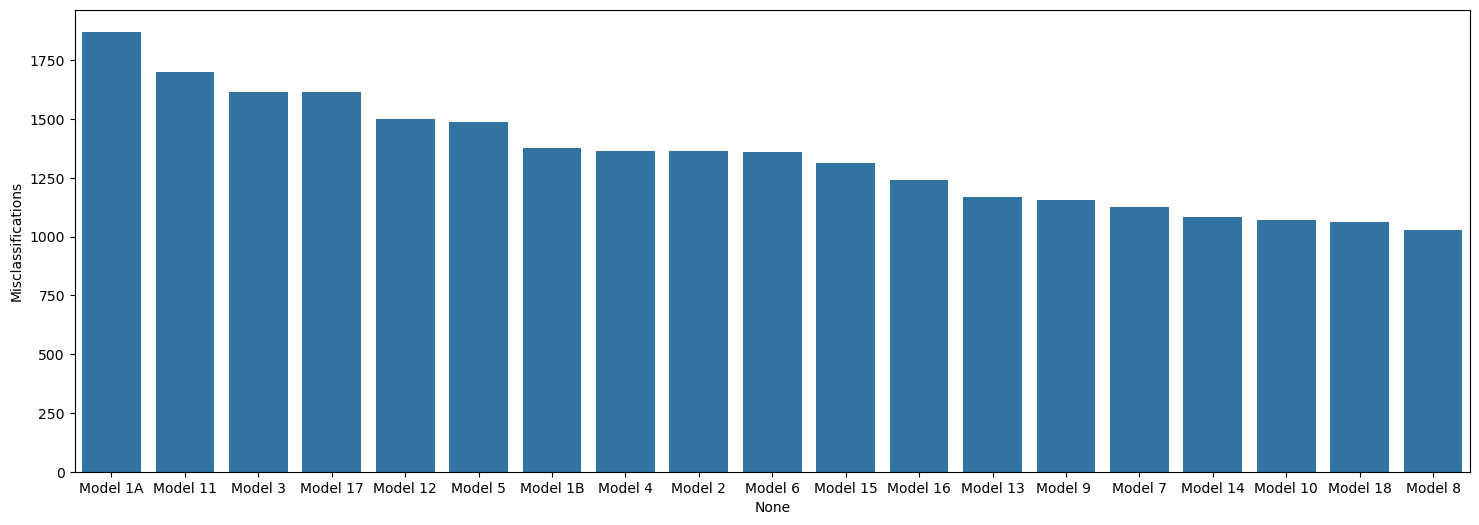

In [ ]:
misclassification_counts_df = pd.DataFrame(pd.Series(misclassification_counts))

misclassification_counts_df.columns = [ 'Misclassifications']

misclassification_counts_df = misclassification_counts_df.sort_values(by='Misclassifications', ascending=False)


plt.figure(figsize=(18, 6))
sns.barplot(data=misclassification_counts_df, x=misclassification_counts_df.index, y='Misclassifications' )

# Comparisons

## Model 2 vs Model 6

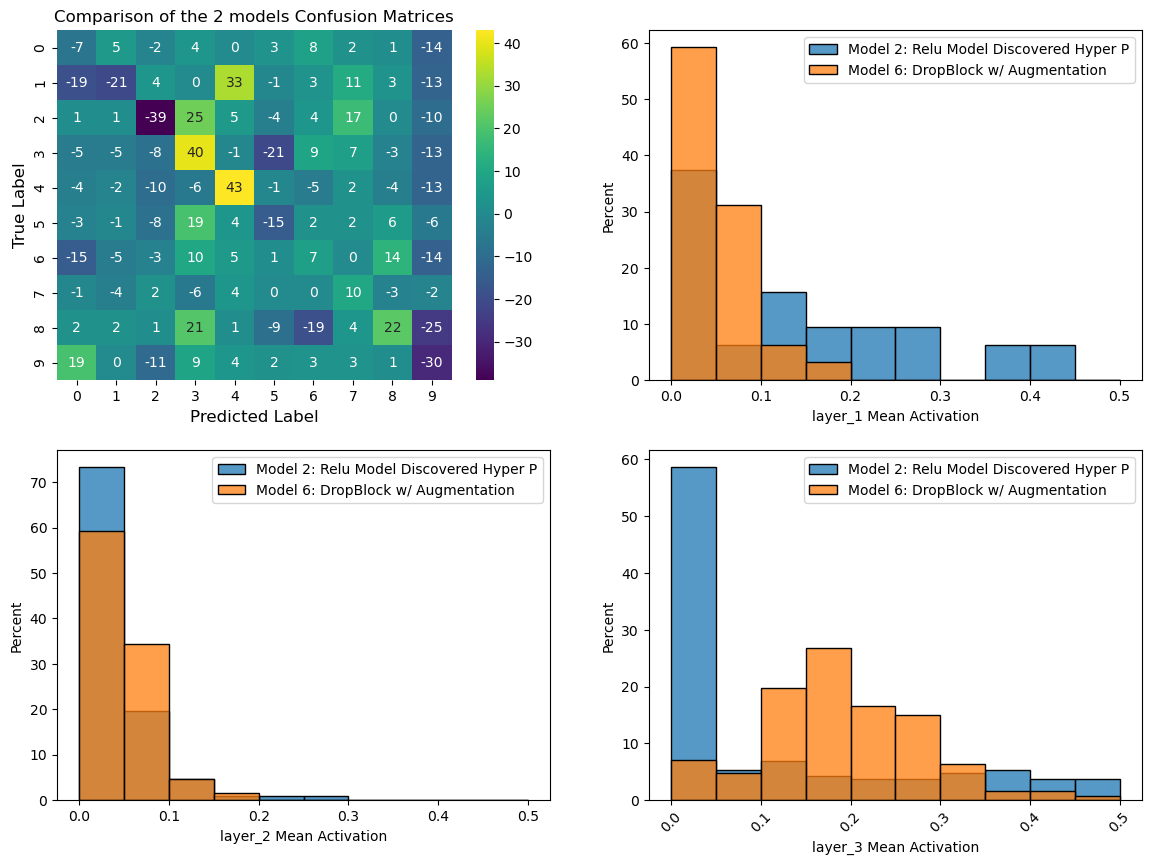

In [ ]:
import importlib
import utils.plotting
import utils.statistics
importlib.reload(utils.statistics)
importlib.reload(utils.plotting)
from utils.statistics import display_neurons_count, display_mean_activations
from utils.plotting import model_comparison_confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(14, 10))



# display_neurons_count(initial_relu_model_hyper_p_best, test_dataset, ('Model 2: Relu Model Discovered Hyper P', axes[0,0]) )
# display_neurons_count(model_6_relu_model_with_dropblock_aug_best, test_dataset, ('Model 6: DropBlock w/ Augmentation', axes[0,0]) )
model_comparison_confusion_matrix(initial_relu_model_hyper_p_best, model_6_relu_model_with_dropblock_aug_best, test_dataset, (axes[0,0]) )

display_mean_activations(initial_relu_model_hyper_p_best, test_dataset, '1', 0, 0.5, 11, ('Model 2: Relu Model Discovered Hyper P', axes[0,1]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '1',0, 0.5, 11, ('Model 6: DropBlock w/ Augmentation', axes[0,1]) )

display_mean_activations(initial_relu_model_hyper_p_best, test_dataset, '2', 0, 0.5, 11, ('Model 2: Relu Model Discovered Hyper P', axes[1,0]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '2', 0, 0.5, 11, ('Model 6: DropBlock w/ Augmentation', axes[1,0]) )

display_mean_activations(initial_relu_model_hyper_p_best, test_dataset, '3', 0, 0.5, 11, ('Model 2: Relu Model Discovered Hyper P', axes[1,1]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '3', 0, 0.5, 11,  ('Model 6: DropBlock w/ Augmentation', axes[1,1]) )



In [ ]:

model_6_relu_model_with_dropblock_aug_path = 'saved models/3. model 3 dropblock/aug/'
basic_model_path = 'Saved Models/1. Model 1/basic/'

# History
model_2_history = np.load(basic_model_path + 'build_simple_relu_model_basic_history_hyper_p.npy', allow_pickle=True).item()
model_6_history = np.load(model_6_relu_model_with_dropblock_aug_path + 'model_6_relu_model_with_dropblock_aug_history.npy', allow_pickle=True).item()

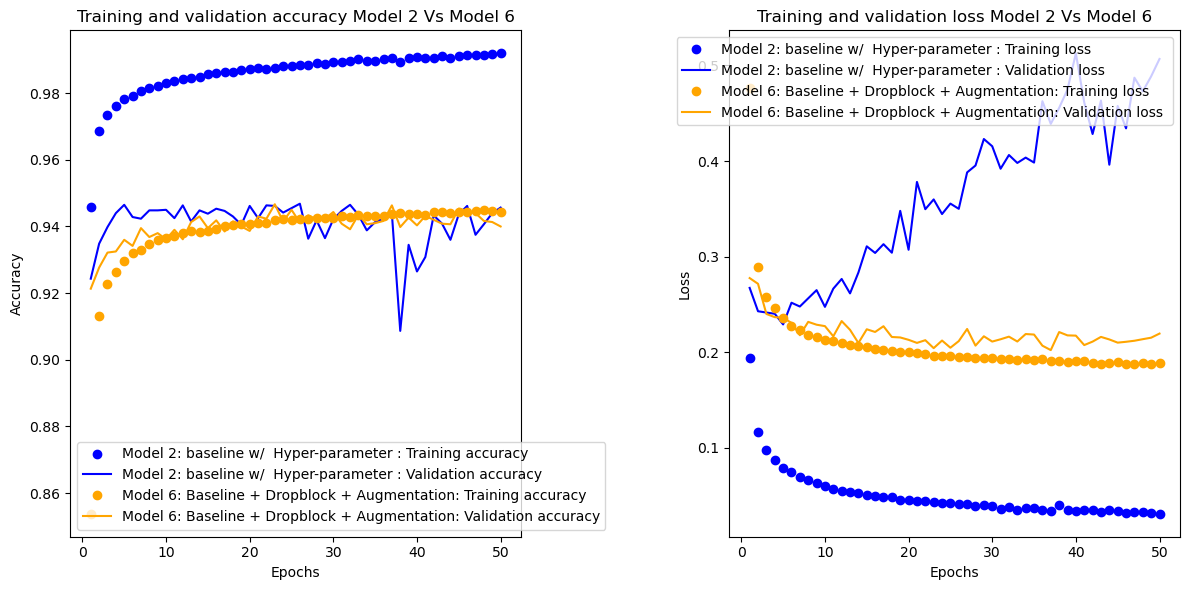

In [ ]:
import importlib
import utils.plotting
importlib.reload(utils.plotting)
from utils.plotting import plot_accuracy_metric_comparison

import pandas as pd

pd1 = pd.DataFrame(model_2_history)

pd2 = pd.DataFrame(model_6_history)

plot_accuracy_metric_comparison(pd1,'Model 2: baseline w/  Hyper-parameter ', pd2, 'Model 6: Baseline + Dropblock + Augmentation',  'Model 2 Vs Model 6')

## Model 1 Vs Model 6

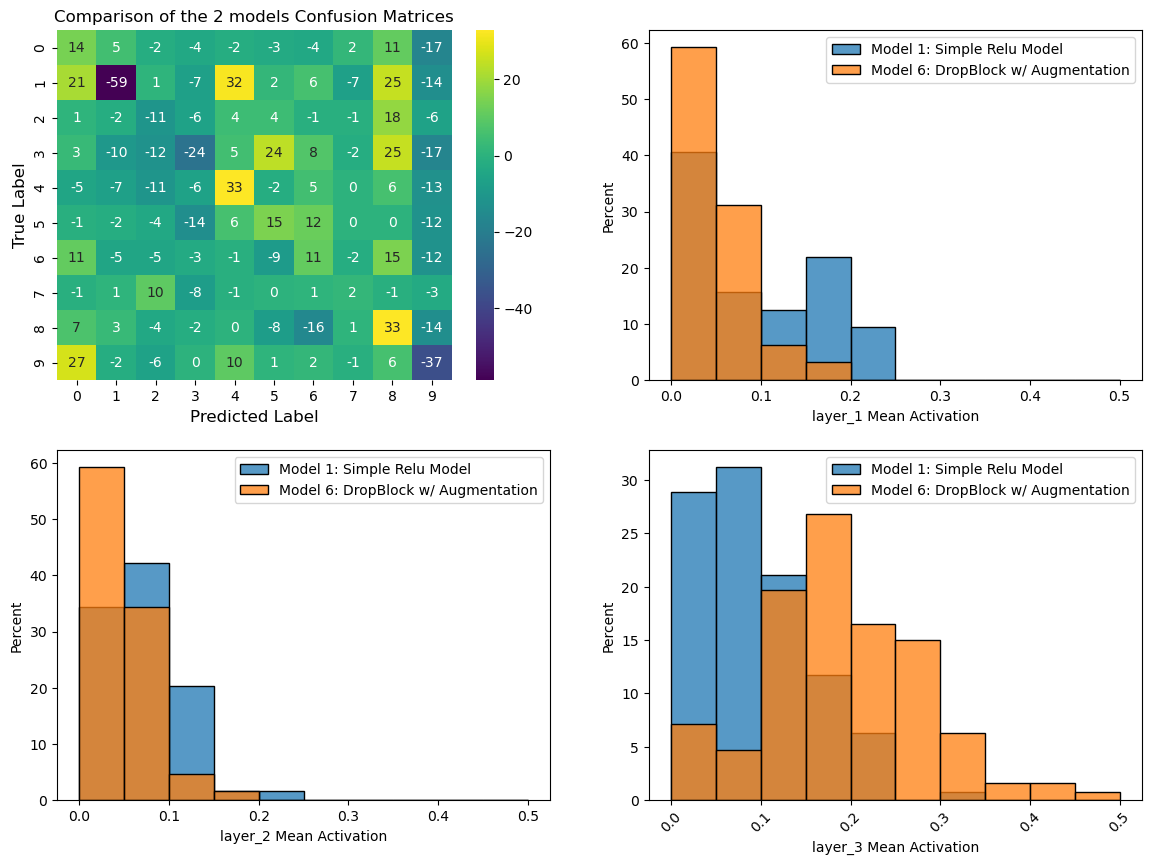

In [ ]:
import importlib
import utils.plotting
import utils.statistics
importlib.reload(utils.statistics)
importlib.reload(utils.plotting)
from utils.statistics import display_neurons_count, display_mean_activations
from utils.plotting import model_comparison_confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(14, 10))



# display_neurons_count(initial_relu_model_hyper_p_best, test_dataset, ('Model 2: Relu Model Discovered Hyper P', axes[0,0]) )
# display_neurons_count(model_6_relu_model_with_dropblock_aug_best, test_dataset, ('Model 6: DropBlock w/ Augmentation', axes[0,0]) )
model_comparison_confusion_matrix(build_simple_relu_model_basic_best, model_6_relu_model_with_dropblock_aug_best, test_dataset, (axes[0,0]) )

display_mean_activations(build_simple_relu_model_basic_best, test_dataset, '1', 0, 0.5, 11, ('Model 1: Simple Relu Model', axes[0,1]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '1',0, 0.5, 11, ('Model 6: DropBlock w/ Augmentation', axes[0,1]) )

display_mean_activations(build_simple_relu_model_basic_best, test_dataset, '2', 0, 0.5, 11, ('Model 1: Simple Relu Model', axes[1,0]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '2', 0, 0.5, 11, ('Model 6: DropBlock w/ Augmentation', axes[1,0]) )

display_mean_activations(build_simple_relu_model_basic_best, test_dataset, '3', 0, 0.5, 11, ('Model 1: Simple Relu Model', axes[1,1]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '3', 0, 0.5, 11,  ('Model 6: DropBlock w/ Augmentation', axes[1,1]) )



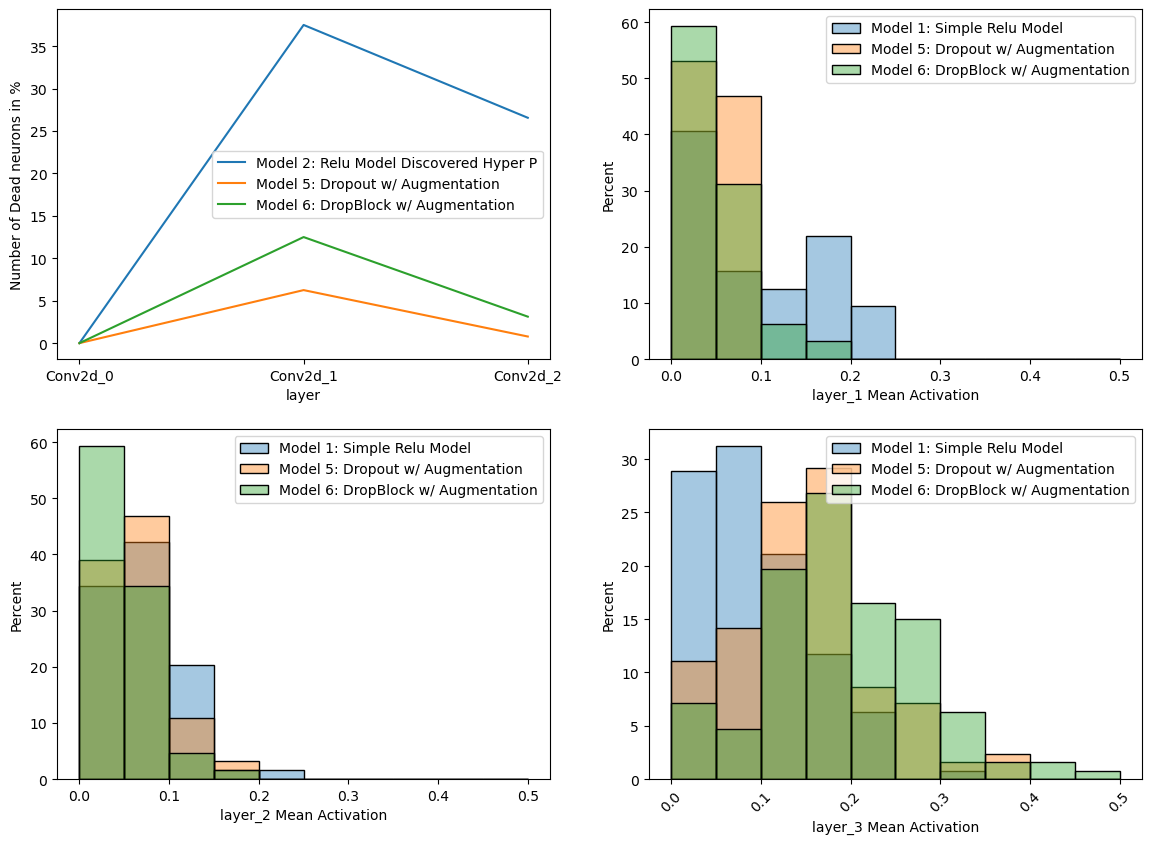

In [ ]:
import importlib
import utils.plotting
import utils.statistics
importlib.reload(utils.statistics)
importlib.reload(utils.plotting)
from utils.statistics import display_neurons_count, display_mean_activations
from utils.plotting import model_comparison_confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(14, 10))



display_neurons_count(initial_relu_model_hyper_p_best, test_dataset, ('Model 2: Relu Model Discovered Hyper P', axes[0,0]) )
display_neurons_count(model_5_relu_model_with_dropout_aug_best, test_dataset,('Model 5: Dropout w/ Augmentation', axes[0,0]) )
display_neurons_count(model_6_relu_model_with_dropblock_aug_best, test_dataset, ('Model 6: DropBlock w/ Augmentation', axes[0,0]) )
# model_comparison_confusion_matrix(build_simple_relu_model_basic_best, model_6_relu_model_with_dropblock_aug_best, test_dataset, (axes[0,0]) )

display_mean_activations(build_simple_relu_model_basic_best, test_dataset, '1', 0, 0.5, 11, ('Model 1: Simple Relu Model', axes[0,1]) )
display_mean_activations(model_5_relu_model_with_dropout_aug_best, test_dataset, '1',0, 0.5, 11, ('Model 5: Dropout w/ Augmentation', axes[0,1]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '1',0, 0.5, 11, ('Model 6: DropBlock w/ Augmentation', axes[0,1]) )

display_mean_activations(build_simple_relu_model_basic_best, test_dataset, '2', 0, 0.5, 11, ('Model 1: Simple Relu Model', axes[1,0]) )
display_mean_activations(model_5_relu_model_with_dropout_aug_best, test_dataset, '2', 0, 0.5, 11, ('Model 5: Dropout w/ Augmentation', axes[1,0]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '2', 0, 0.5, 11, ('Model 6: DropBlock w/ Augmentation', axes[1,0]) )

display_mean_activations(build_simple_relu_model_basic_best, test_dataset, '3', 0, 0.5, 11, ('Model 1: Simple Relu Model', axes[1,1]) )
display_mean_activations(model_5_relu_model_with_dropout_aug_best,  test_dataset, '3', 0, 0.5, 11,  ('Model 5: Dropout w/ Augmentation', axes[1,1]) )
display_mean_activations(model_6_relu_model_with_dropblock_aug_best, test_dataset, '3', 0, 0.5, 11,  ('Model 6: DropBlock w/ Augmentation', axes[1,1]) )

## Model 5 & 6 Confusion matrix


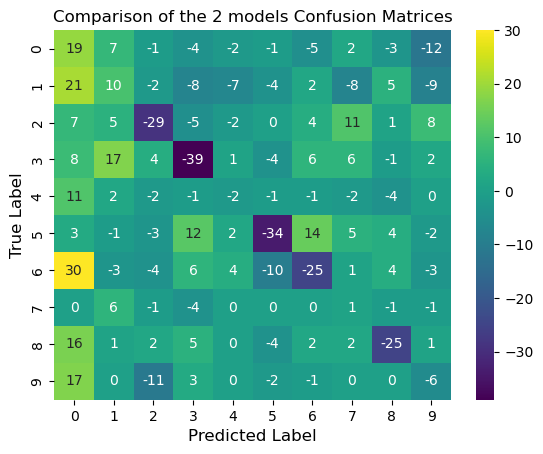

In [ ]:
importlib.reload(utils.plotting)
from utils.plotting import model_comparison_confusion_matrix

model_comparison_confusion_matrix(model_5_relu_model_with_dropout_aug_best, model_6_relu_model_with_dropblock_aug_best, test_dataset )

# Unknown

In [ ]:
import keras
from keras import layers
from keras.constraints import MaxNorm
from keras.optimizers import Adam

def model_9_relu_w_dropout_aug_batch_maxnorm_lr(hp):

    model = keras.Sequential()
    
    model.add(layers.InputLayer(input_shape=(32, 32, 3)))
    model.add(layers.Dropout(rate=hp.Choice('rate_1', [0.25,0.5,0.75])))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                             kernel_constraint=hp.Choice('max_norm_1', [MaxNorm(3),
                                                                        MaxNorm(3.25),
                                                                        MaxNorm(3.5),
                                                                        MaxNorm(3.75),
                                                                        MaxNorm(4)]),
                             activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))    
    model.add(layers.Dropout(rate=hp.Choice('rate_2', [0.25,0.5,0.75])))

    model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1),
                             kernel_constraint=hp.choice('max_norm_2', [MaxNorm(3),
                                                                        MaxNorm(3.25),
                                                                        MaxNorm(3.5),
                                                                        MaxNorm(3.75),
                                                                        MaxNorm(4)]),
                             activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))    
    model.add(layers.Dropout(rate=hp.Choice('rate_3', [0.25,0.5,0.75]))) 

    model.add(layers.Conv2D(128,kernel_size=(3, 3), strides=(1,1), 
                             kernel_constraint=hp.choice('max_norm_3', [MaxNorm(3),
                                                                        MaxNorm(3.25),
                                                                        MaxNorm(3.5),
                                                                        MaxNorm(3.75),
                                                                        MaxNorm(4)]),
                             activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))    
    model.add(layers.Dropout(rate=hp.Choice('rate_4', [0.25,0.5,0.75])))

    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='relu'),
               kernel_constraint=hp.choice('max_norm_4', [MaxNorm(3),
                                                          MaxNorm(3.25),
                                                          MaxNorm(3.5),
                                                          MaxNorm(3.75),
                                                          MaxNorm(4)]))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=hp.Choice('rate_5', [0.25,0.5,0.75])))

    model.add(layers.Dense(10, activation='softmax'))

    # initial_learning_rate = 0.0010000
    initial_learning_rate = 0.1000000
    # decay_rate = 0.001000
    decay_rate = 0.96

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=1000,  # One epoch = one decay step
        decay_rate=decay_rate,
        staircase=True  # Decay happens at discrete steps (after each epoch)
    )

    optimizer = Adam(learning_rate=initial_learning_rate)


    model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy']
    )
    return model   

In [ ]:
## Bottle neck 1 cycle example

import importlib
import utils.keras_callback
importlib.reload(utils.keras_callback)
from utils.keras_callback import TimeHistory, CLR_history, stop_model
from keras.optimizers import Adam
import tensorflow_addons as tfa
import math


# MAX_LR = 2.5e-2
# INIT_LR = 1.25e-3

# MAX_LR = 1.75e-2
# INIT_LR = 1.75e-3

MAX_LR = 2e-2
INIT_LR = 1e-3


epoch_count = 25

steps_per_epoch = math.ceil(len(X_train_normalized) / BATCH_SIZE)
# validation_steps = len(X_val_normalized) // BATCH_SIZE

def scale_fn(x):
    return 1.0

clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    # scale_fn=lambda x: 1.0,               # https://stackoverflow.com/questions/67656969/what-does-tensorflows-cyclicallearningrate-scale-fn-argument-mean
    scale_fn=scale_fn,
    step_size=(steps_per_epoch * epoch_count) / 2            # 1 Cycle
)
optimizer = Adam(clr)


model_17_bottleneck.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy']
    )





model_17_bottleneck_clr_history = CLR_history()

model_17_bottleneck_clr_time = TimeHistory()

model_17_bottleneck_path = 'saved models/2. model 2 dropout/bottleneck/'

best_model = [tf.keras.callbacks.ModelCheckpoint(
        filepath=model_17_bottleneck_path  + "model_17_bottleneck_clr_best.keras",
        save_best_only=True,
        monitor="val_loss")
]


model_17_bottleneck_history = model_17_bottleneck.fit(
    aug_train_dataset,                                  # Training data and labels
    validation_data=(val_dataset),                  # Validation data and labels
    epochs=epoch_count,                                     # Number of epochs
    class_weight=d_class_weights,                   # Adding Class Weights
    callbacks=[ best_model, model_17_bottleneck_clr_history, model_17_bottleneck_clr_time],             # Callbacks
    verbose=1                                       # Verbosity mode (1 for progress bar)
)

Epoch 1/25
4675/4675 [==============================] - 37s 7ms/step - loss: 0.5717 - accuracy: 0.8210 - val_loss: 0.3714 - val_accuracy: 0.8943
Epoch 2/25
4675/4675 [==============================] - 35s 7ms/step - loss: 0.3262 - accuracy: 0.9017 - val_loss: 0.2938 - val_accuracy: 0.9148
Epoch 3/25
4675/4675 [==============================] - 37s 7ms/step - loss: 0.3006 - accuracy: 0.9098 - val_loss: 0.2903 - val_accuracy: 0.9188
Epoch 4/25
4675/4675 [==============================] - 37s 7ms/step - loss: 0.2895 - accuracy: 0.9130 - val_loss: 0.2901 - val_accuracy: 0.9187
Epoch 5/25
4675/4675 [==============================] - 44s 8ms/step - loss: 0.2834 - accuracy: 0.9151 - val_loss: 0.2861 - val_accuracy: 0.9193
Epoch 6/25
4675/4675 [==============================] - 36s 7ms/step - loss: 0.2814 - accuracy: 0.9162 - val_loss: 0.2705 - val_accuracy: 0.9218
Epoch 7/25
4675/4675 [==============================] - 38s 7ms/step - loss: 0.2792 - accuracy: 0.9166 - val_loss: 0.2673 - val_ac

KeyboardInterrupt: 

In [ ]:
from keras.utils import plot_model
plot_model(model_14_extend, to_file='model_14_extend.png')